# Lab 6

In [0]:
import networkx as nx
from networkx.algorithms import node_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
G = nx.path_graph(4)
gpos = nx.spectral_layout(G)

G.edges()

EdgeView([(0, 1), (1, 2), (2, 3)])

In [58]:
G.nodes

NodeView((0, 1, 2, 3))

In [59]:
G.node[0]['label'] = 'blue'
G.node[3]['label'] = 'red'

node_color = [G.node[n]['label'] if 'label' in G.node[n] else 'black' for n in G.nodes]
node_color

['blue', 'black', 'black', 'red']

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


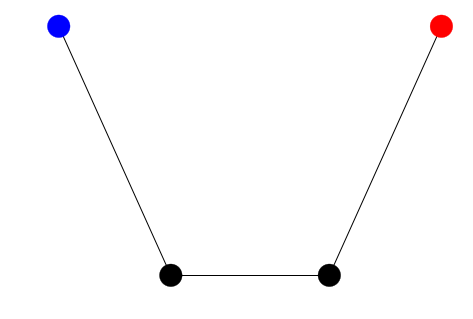

In [60]:
nx.draw(G, gpos, with_labels=False, node_size=512, node_color=node_color)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


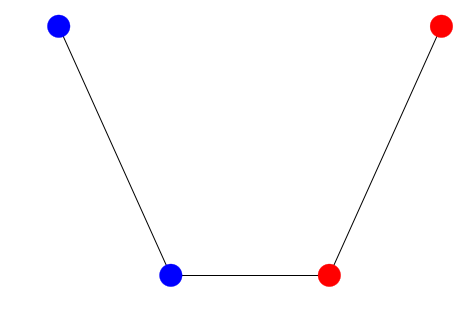

In [61]:
nx.draw(G,gpos, with_labels=False, node_size=512, node_color=node_classification.harmonic_function(G))

In [0]:
G = nx.karate_club_graph()

In [0]:
colored_clubs = ['red' if G.nodes[n]['club'] == 'Officer' else 'blue' for n in G.nodes]

In [0]:
gpos = nx.spring_layout(G, iterations=200)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


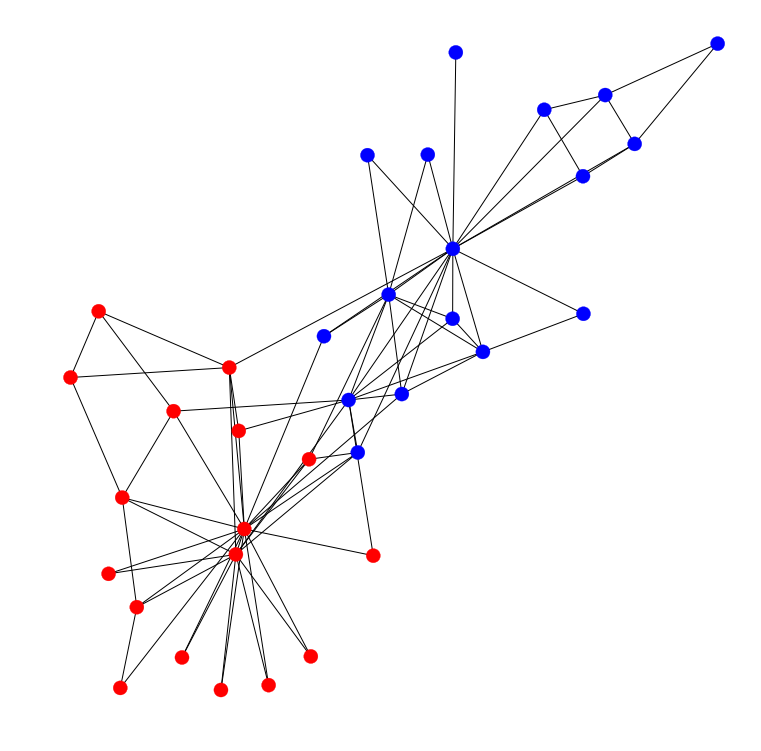

In [65]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=colored_clubs)
plt.show()

In [0]:
label_removed = set([0, 1, 2, 3, 4, 5, 6, 7])
for i in label_removed:
    del G.node[i]['club']

In [67]:
G.node[8]['club']

'Mr. Hi'

In [0]:
colored_clubs = [
    'red' if 'club' in G.node[n] and G.node[n]['club'] == 'Officer' 
    else 'blue' if 'club' in G.node[n] and G.node[n]['club'] == 'Mr. Hi' 
    else 'gray' for n in G.nodes
]

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


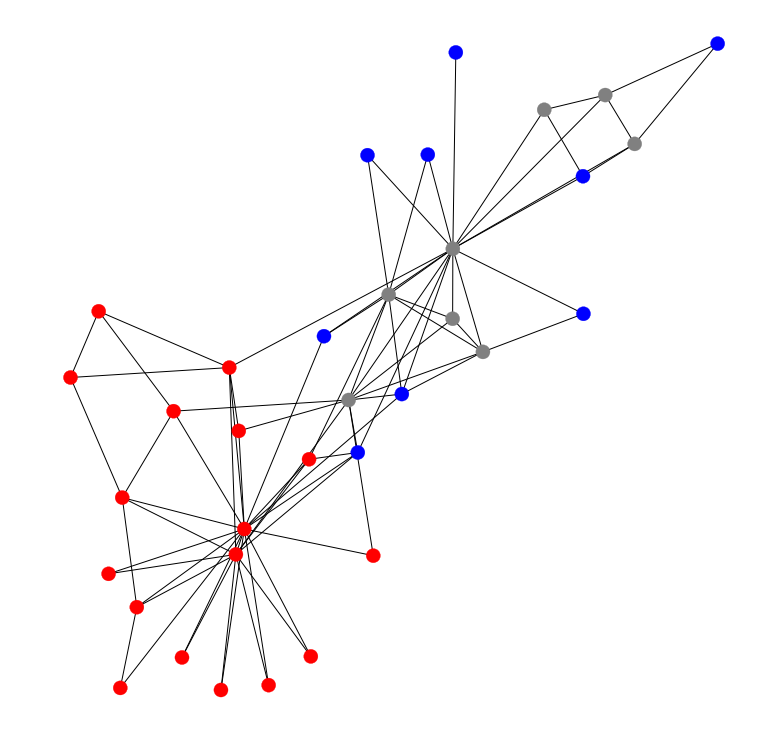

In [69]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=colored_clubs)
plt.show()

In [70]:
from nose.tools import *

predicted = node_classification.harmonic_function(G, label_name='club')
label_not_removed = set(list(range(len(G)))) - label_removed
for i in label_not_removed:
    print(predicted[i], G.node[i]['club'])
    assert_equal(predicted[i], G.node[i]['club'])

Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Officer Officer
Officer Officer
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer


# Graded Part


In [0]:
def create_toroidal(k):
    G=nx.Graph()
    count = 0
    mapping1 = {}
    mapping2 = {}
    for i in range(k):
        for j in range(k):
            mapping1[count] = (i,j)
            mapping2[(i,j)] = count
            G.add_node(count)
            count +=1
    for i in range(k):
        for j in range(k):
            if (i,j+1) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i,j+1])
            if (i,j-1) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i,j-1])
            if (i+1,j) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i+1,j])
            if (i-1,j) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i-1,j])  
    j = 0
    for i in range(k):
        G.add_edge(mapping2[(i,j)],mapping2[i,j+k-1])
    i = 0
    for j in range(k):
        G.add_edge(mapping2[(i,j)],mapping2[i+k-1,j])
    return G

In [72]:
G = create_toroidal(16)  
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [0]:
G.node[0]['label'] = 'blue'
G.node[255]['label'] = 'red'
gpos = nx.spring_layout(G, iterations=200)
node_color=['blue' if n == 0 else 'red' if n == 255 else 'gray' for n in G.nodes]

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


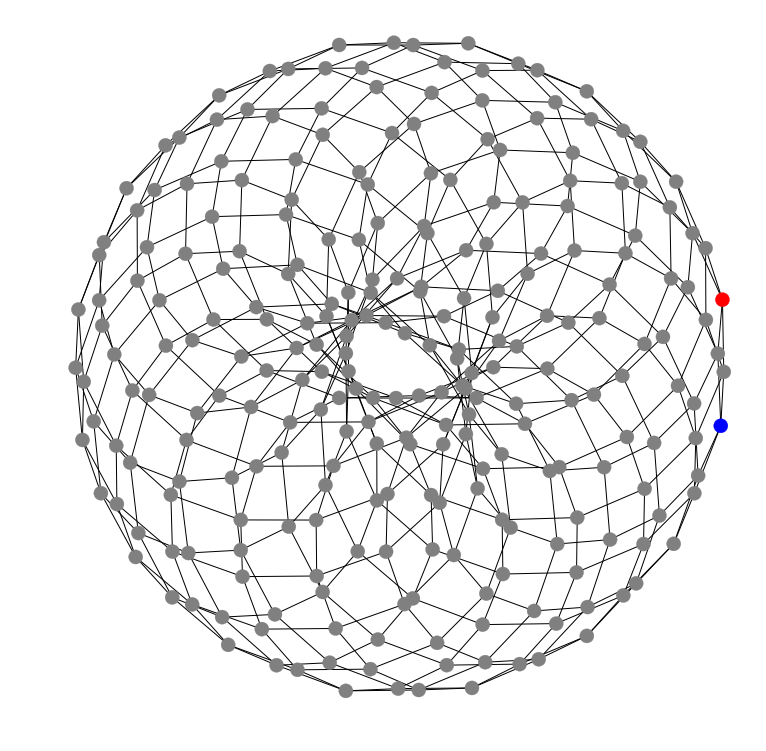

In [74]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [0]:
node_color=node_classification.harmonic_function(G)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


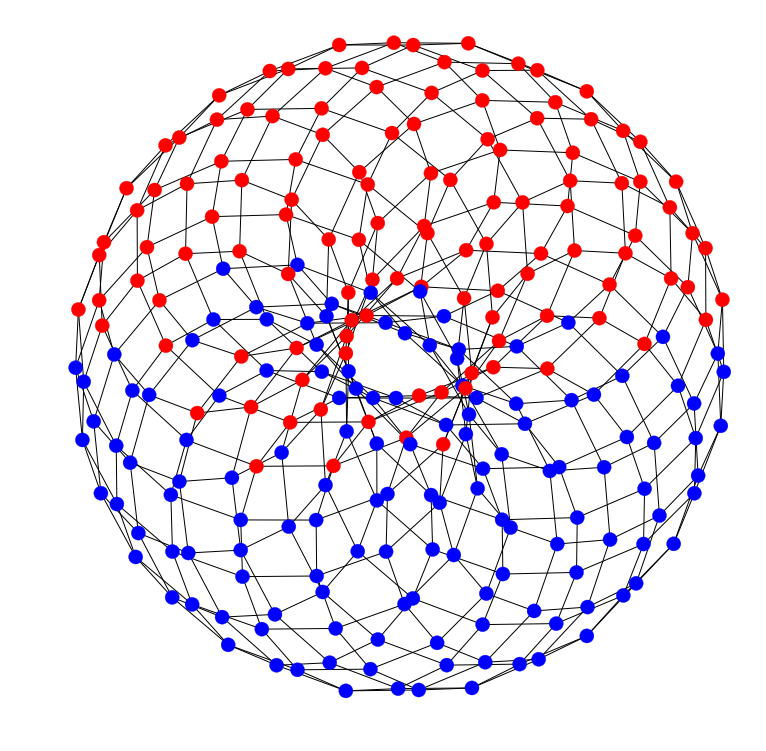

In [76]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [77]:
print(node_color)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 're

In [0]:
removed = [n for n in G.nodes if n%3 == 0 ]
for n in G.nodes:
    if n not in removed:
        G.node[n]['label'] = node_color[n]

In [79]:
print(G.node[1])
print(G.node[2])
print(G.node[3])
print(G.node[4])
print(G.node[252])
print(G.node[253])
print(G.node[254])
print(G.node[255])

{'label': 'blue'}
{'label': 'blue'}
{}
{'label': 'blue'}
{}
{'label': 'red'}
{'label': 'red'}
{'label': 'red'}


In [0]:
predicted = node_classification.harmonic_function(G, label_name='label')

In [81]:
print(predicted)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'r

In [82]:
for i in range(len(node_color)):
    print(predicted[i], node_color[i])
    assert_equal(predicted[i], node_color[i])

blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
red red
red red
red red
red red
red red
red red
red red
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue red


AssertionError: ignored

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [84]:
confusion_matrix(node_color, predicted)

array([[136,   0],
       [  2, 118]])

In [85]:
precision_recall_fscore_support(node_color, predicted)

(array([0.98550725, 1.        ]),
 array([1.        , 0.98333333]),
 array([0.99270073, 0.99159664]),
 array([136, 120]))

# Harmonic function implementation

In [0]:
def your_harmonic_function(Graph, label_name):
    def _get_labels(G, label):
        labels = {}
        label_to_id = {}
        count = 0
        for i, node in G.nodes(data=True):
            if label in node:
                if node[label] not in label_to_id:
                    label_to_id[node[label]] = count
                    count += 1
                labels[i] = node[label]
        return labels, label_to_id

    def _build_diagonal_matrix(W, labels):
        from scipy import sparse

        degrees = W.sum(axis=0)
        D = sparse.diags(degrees, offsets=0)
        return D.toarray()

    def _build_function_matrix(W, labels, label_to_id):
        n_samples = W.shape[0]
        F = np.zeros((n_samples, 1))
        for id, label in labels.items():
            F[id][0] = label_to_id[label]
        return F

    def _get_unlabeled_and_labeled(n_samples, labels):
        unlabeled = []
        labeled = []
        for i in range(n_samples):
            if i not in labels:
                unlabeled.append(i)
            else:
                labeled.append(i)
        return unlabeled, labeled

    def _filter_uu(matrix, unlabeled):
        # filter unlabeled - unlabeled
        n = len(unlabeled)
        new_matrix = np.zeros((n, n))
        for i, ii in enumerate(unlabeled):
            for j, jj in enumerate(unlabeled):
                new_matrix[i][j] = matrix[ii][jj]
        return new_matrix

    def _filter_l(matrix, labeled):
        # filter unlabeled - unlabeled
        n = len(labeled)
        new_matrix = np.zeros((n, 1))
        for i, ii in enumerate(labeled):
            new_matrix[i][0] = matrix[ii][0]
        return new_matrix

    def _filter_ul(matrix, unlabeled, labeled):
        # filter unlabeled - labeled
        new_matrix = np.zeros((len(unlabeled), len(labeled)))
        for i, ii in enumerate(unlabeled):
            for j, jj in enumerate(labeled):
                new_matrix[i][j] = matrix[ii][jj]
        return new_matrix

    def _predict(F_u, F_l, label_to_id, labels):
        # predict with class mass normalization
        preds = ['' for i in range(len(unlabeled) + len(labeled))]

        id_to_label = {v: k for k, v in label_to_id.items()}

        count_1 = 0
        count_0 = 0
        mass_class_1 = 0
        mass_class_0 = 0

        for i in labeled:
            preds[i] = labels[i]
            if label_to_id[preds[i]] == 1:
                count_1 += 1
            else:
                count_0 += 1

        for i in range(len(unlabeled)):
            p = F_u[i][0]
            mass_class_1 += p
            mass_class_0 += (1 - p)

        for i in range(len(unlabeled)):
            p = F_u[i][0]
            j = unlabeled[i]
            if count_1 * p / mass_class_1 > count_0 * (1 - p) / mass_class_0:
                preds[j] = id_to_label[1]
            else:
                preds[j] = id_to_label[0]

        return preds

    W = nx.to_scipy_sparse_matrix(G) # adjacency matrix
    W = np.array(W.todense())
    labels, label_to_id = _get_labels(G, label_name)

    F = _build_function_matrix(W, labels, label_to_id)
    D = _build_diagonal_matrix(W, labels)

    unlabeled, labeled = _get_unlabeled_and_labeled(W.shape[0], labels)

    D_uu = _filter_uu(D, unlabeled)
    W_uu = _filter_uu(W, unlabeled)
    W_ul = _filter_ul(W, unlabeled, labeled)
    F_l = _filter_l(F, labeled)

    F_u = np.linalg.inv(D_uu - W_uu).dot(W_ul).dot(F_l)

    preds = _predict(F_u, F_l, label_to_id, labels)

    return preds


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


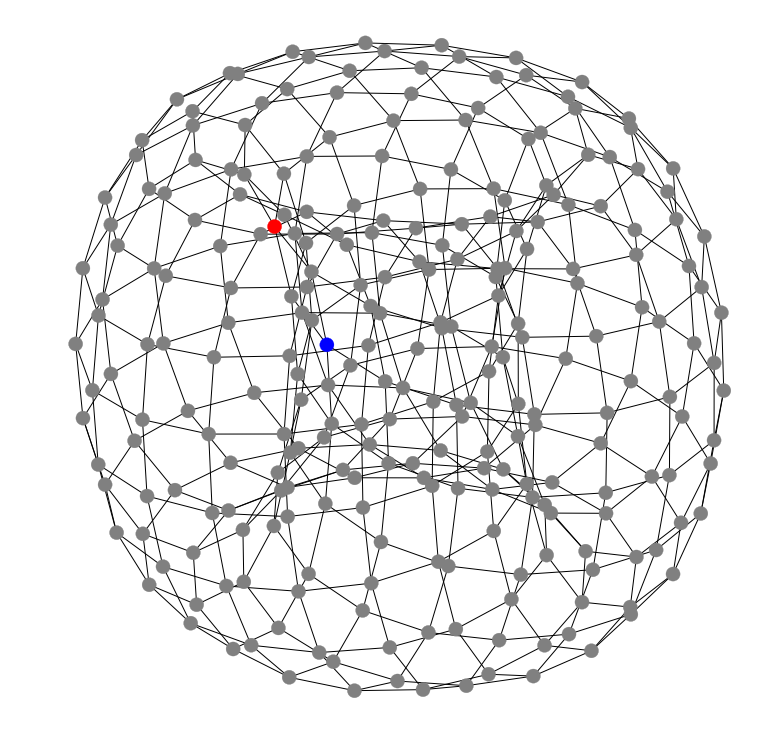

In [94]:
G = create_toroidal(16)  
G.node[0]['label'] = 'blue'
G.node[255]['label'] = 'red'
gpos = nx.spring_layout(G, iterations=200)
node_color=['blue' if n == 0 else 'red' if n == 255 else 'gray' for n in G.nodes]
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [97]:
node_color=node_classification.harmonic_function(G)
removed = [n for n in G.nodes if n%3 == 0]
for n in G.nodes:
    if n not in removed:
        G.node[n]['label'] = node_color[n]
predicted = your_harmonic_function(G, label_name='label')

confusion_matrix(node_color, predicted)

array([[138,   0],
       [  0, 118]])

In [98]:
precision_recall_fscore_support(node_color, predicted)

(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([138, 118]))